In [3]:
import movmus as mm
import numpy as np
import matplotlib.pyplot as plt
import os

import pydot
import graphviz
from tensorflow.keras.utils import plot_model

In [4]:
model_name = 'M_20_1000'
model_folder = '.\\MODELS_1000'
plot_folder = '.\\PLOTS_1000'

In [87]:
model_name = 'BASE_SUBJ_CONTEXT_MODEL_4'
model_folder = '.\\MODELS_SC'
plot_folder = '.\\PLOTS_SC'

In [119]:
model_name = 'BASE_TASK_CONTEXT_MODEL_6'
model_folder = '.\\MODELS_TC'
plot_folder = '.\\PLOTS_TC'

In [120]:
model = mm.load_model(model_folder, model_name)


Loading model from .\MODELS_TC\BASE_TASK_CONTEXT_MODEL_6.keras
Num Layers: 15
----
----
Layer: emg_input
{
    "batch_shape": [
        null,
        1000,
        7
    ],
    "dtype": "float32",
    "sparse": false,
    "name": "emg_input"
}
----
----
Layer: conv1d_34
{
    "name": "conv1d_34",
    "trainable": true,
    "dtype": {
        "module": "keras",
        "class_name": "DTypePolicy",
        "config": {
            "name": "float32"
        },
        "registered_name": null
    },
    "filters": 16,
    "kernel_size": [
        5
    ],
    "strides": [
        1
    ],
    "padding": "valid",
    "data_format": "channels_last",
    "dilation_rate": [
        1
    ],
    "groups": 1,
    "activation": "relu",
    "use_bias": true,
    "kernel_initializer": {
        "module": "keras.initializers",
        "class_name": "GlorotUniform",
        "config": {
            "seed": null
        },
        "registered_name": null
    },
    "bias_initializer": {
        "module"

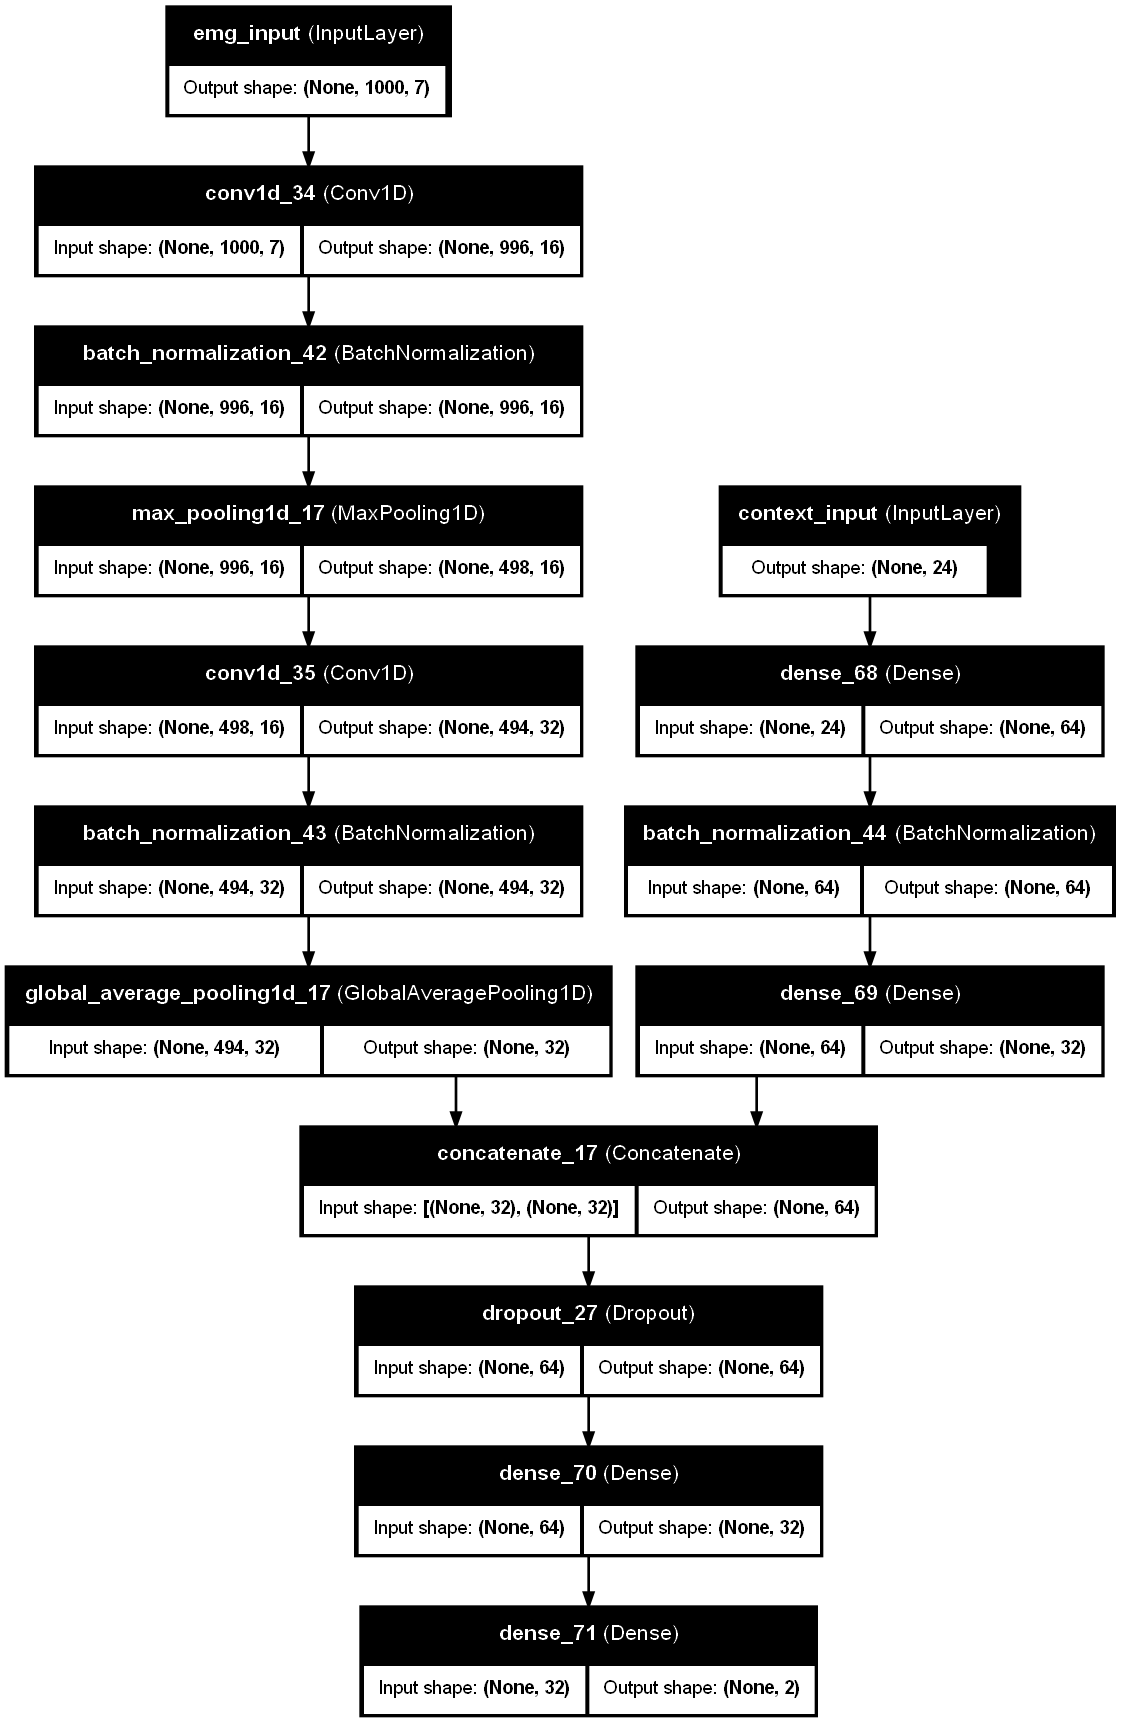

In [121]:

import pydot
import graphviz
from tensorflow.keras.utils import plot_model
plot_model(model, to_file=f'{plot_folder}\\{model_name}.png', 
           show_shapes=True, 
           show_layer_names=True, 
           expand_nested=True, 
           dpi=96, 
           rankdir='TB', 
           show_dtype=False,
           )

In [122]:
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ emg_input           │ (None, 1000, 7)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_34 (Conv1D)  │ (None, 996, 16)   │        576 │ emg_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 996, 16)   │         64 │ conv1d_34[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_17    │ (None, 498, 16)   │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ context_input       │ (None, 24)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_35 (Conv1D)  │ (None, 494, 32)   │      2,592 │ max_pooling1d_17… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_68 (Dense)    │ (None, 64)        │      1,600 │ context_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 494, 32)   │        128 │ conv1d_35[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_68[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_69 (Dense)    │ (None, 32)        │      2,080 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_17      │ (None, 64)        │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ dense_69[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_27          │ (None, 64)        │          0 │ concatenate_17[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_70 (Dense)    │ (None, 32)        │      2,080 │ dropout_27[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_71 (Dense)    │ (None, 2)         │         66 │ dense_70[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,879 (108.91 KB)

 Trainable params: 9,218 (36.01 KB)

 Non-trainable params: 224 (896.00 B)

 Optimizer params: 18,437 (72.02 KB)

In [123]:
history = mm.load_history(model_folder, model_name)


History loaded from .\MODELS_TC\BASE_TASK_CONTEXT_MODEL_6_history.json


In [124]:
history.keys()

dict_keys(['AUC', 'Precision', 'Recall', 'accuracy', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_accuracy', 'val_loss', 'training_time', 'model', 'batch_size', 'epochs', 'learning_rate', 'decay_steps', 'alpha', 'loss_function', 'optimizer'])

In [125]:
learning_rate = history['learning_rate']
decay_steps = history['decay_steps']
alpha = history['alpha']

print(f'Learning rate: {learning_rate}')
print(f'Decay steps: {decay_steps}')
print(f'Alpha: {alpha}')

Learning rate: 0.001
Decay steps: 12000.0
Alpha: 0.01


In [126]:
training_time = history['training_time']/60
print(f'Training time: {training_time} minutes')

Training time: 3.3327362298965455 minutes


In [127]:
history['batch_size']

68

In [128]:
history['loss']

[1.2859647274017334,
 0.9450332522392273,
 0.7355740666389465,
 0.5822944641113281,
 0.48833560943603516,
 0.42708420753479004,
 0.38189342617988586,
 0.36068883538246155,
 0.33797842264175415,
 0.31284818053245544,
 0.30651968717575073,
 0.2936619818210602,
 0.2770543098449707,
 0.26428014039993286,
 0.26828500628471375,
 0.248391792178154,
 0.2428089827299118,
 0.24474947154521942,
 0.23515871167182922,
 0.2328714281320572,
 0.23191173374652863,
 0.2136063575744629,
 0.2124600112438202,
 0.20873349905014038,
 0.1970188319683075,
 0.19970691204071045,
 0.19846227765083313,
 0.2028912752866745,
 0.18965207040309906,
 0.18514534831047058,
 0.17344598472118378,
 0.18169128894805908,
 0.17726977169513702,
 0.18865284323692322,
 0.17426109313964844,
 0.17633987963199615,
 0.162601500749588,
 0.1519198715686798,
 0.15361608564853668,
 0.16812962293624878,
 0.1737663894891739,
 0.15558408200740814,
 0.16193298995494843,
 0.1540151983499527,
 0.15704096853733063,
 0.1547243446111679,
 0.14445

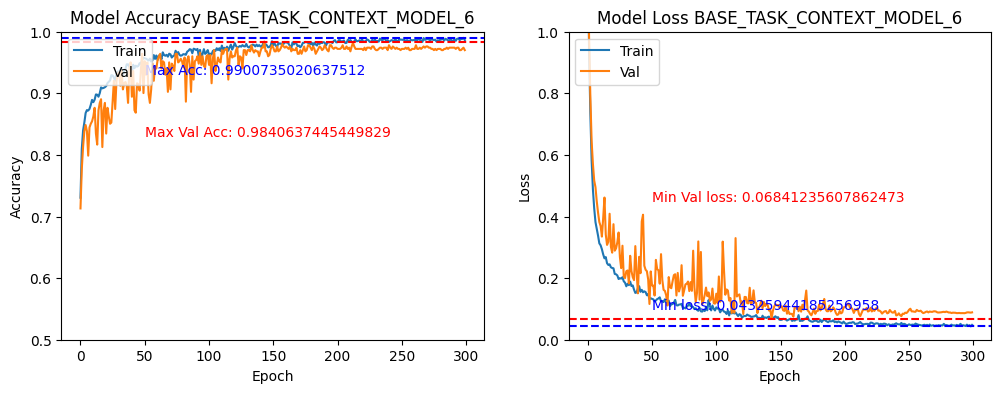

In [129]:
fig, axs = plt.subplots(1,2, figsize=(12, 4))
        
# Subplot 1: Plot training & validation accuracy values
axs[0].plot(history['accuracy'])
axs[0].plot(history['val_accuracy'])
axs[0].set_title('Model Accuracy ' + model_name)

axs[0].axhline(y=max(history['accuracy']), color='b', linestyle='--')  # Add horizontal line at y=0.75
axs[0].text(50,0.93, f'Max Acc: {max(history["accuracy"])}', color='b')  # Add text annotation with the max value

axs[0].axhline(y=max(history['val_accuracy']), color='r', linestyle='--')  # Add horizontal line at y=0.75
axs[0].text(50,0.83, f'Max Val Acc: {max(history["val_accuracy"])}', color='red')  # Add text annotation with the max value
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Val'], loc='upper left')
axs[0].set_ylim(0.5, 1)

# Subplot 2: Plot training & validation loss values
axs[1].plot(history['loss'])
axs[1].plot(history['val_loss'])
axs[1].set_title('Model Loss ' + model_name)
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Val'], loc='upper left')
axs[1].set_ylim(0, 1)

axs[1].axhline(y=min(history['val_loss']), color='r', linestyle='--')  # Add horizontal line at y=0.75
axs[1].text(50,0.45, f'Min Val loss: {min(history["val_loss"])}', color='red')  # Add text annotation with the max value

axs[1].axhline(y=min(history['loss']), color='b', linestyle='--')  # Add horizontal line at y=0.75
axs[1].text(50,0.1, f'Min loss: {min(history["loss"])}', color='b')  # Add text annotation with the max value

# Save the figure with subplots
#plt.savefig(f'{plot_folder}\\ACC_LOSS_{model_name}.png')

# Show the plot
plt.show()

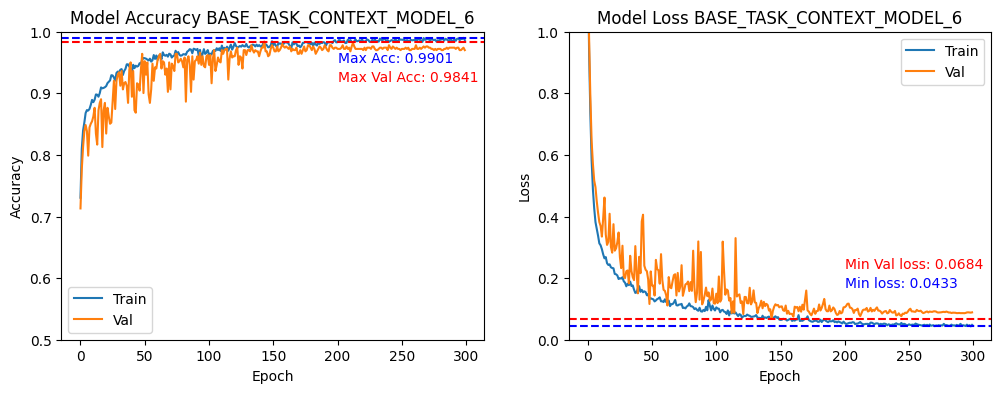

In [136]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Subplot 1: Plot training & validation accuracy values
axs[0].plot(history['accuracy'])
axs[0].plot(history['val_accuracy'])
axs[0].set_title('Model Accuracy ' + model_name)

# Add horizontal line and text annotation for max accuracy
max_acc = max(history['accuracy'])
max_val_acc = max(history['val_accuracy'])
axs[0].axhline(y=max_acc, color='b', linestyle='--')
axs[0].text(200, 0.95, f'Max Acc: {max_acc:.4f}', color='b')  # Max accuracy with 4 decimal places

axs[0].axhline(y=max_val_acc, color='r', linestyle='--')
axs[0].text(200, 0.92, f'Max Val Acc: {max_val_acc:.4f}', color='red')  # Max val accuracy with 4 decimal places
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Val'], loc='lower left')
axs[0].set_ylim(0.5, 1)

# Subplot 2: Plot training & validation loss values
axs[1].plot(history['loss'])
axs[1].plot(history['val_loss'])
axs[1].set_title('Model Loss ' + model_name)
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Val'], loc='upper right')
axs[1].set_ylim(0, 1)

# Add horizontal line and text annotation for min loss
min_loss = min(history['loss'])
min_val_loss = min(history['val_loss'])
axs[1].axhline(y=min_val_loss, color='r', linestyle='--')
axs[1].text(200, 0.23, f'Min Val loss: {min_val_loss:.4f}', color='red')  # Min val loss with 4 decimal places

axs[1].axhline(y=min_loss, color='b', linestyle='--')
axs[1].text(200, 0.17, f'Min loss: {min_loss:.4f}', color='b')  # Min loss with 4 decimal places

# Save the figure with subplots
plt.savefig(f'{plot_folder}\\ACC_LOSS_{model_name}.png')

# Show the plot
plt.show()


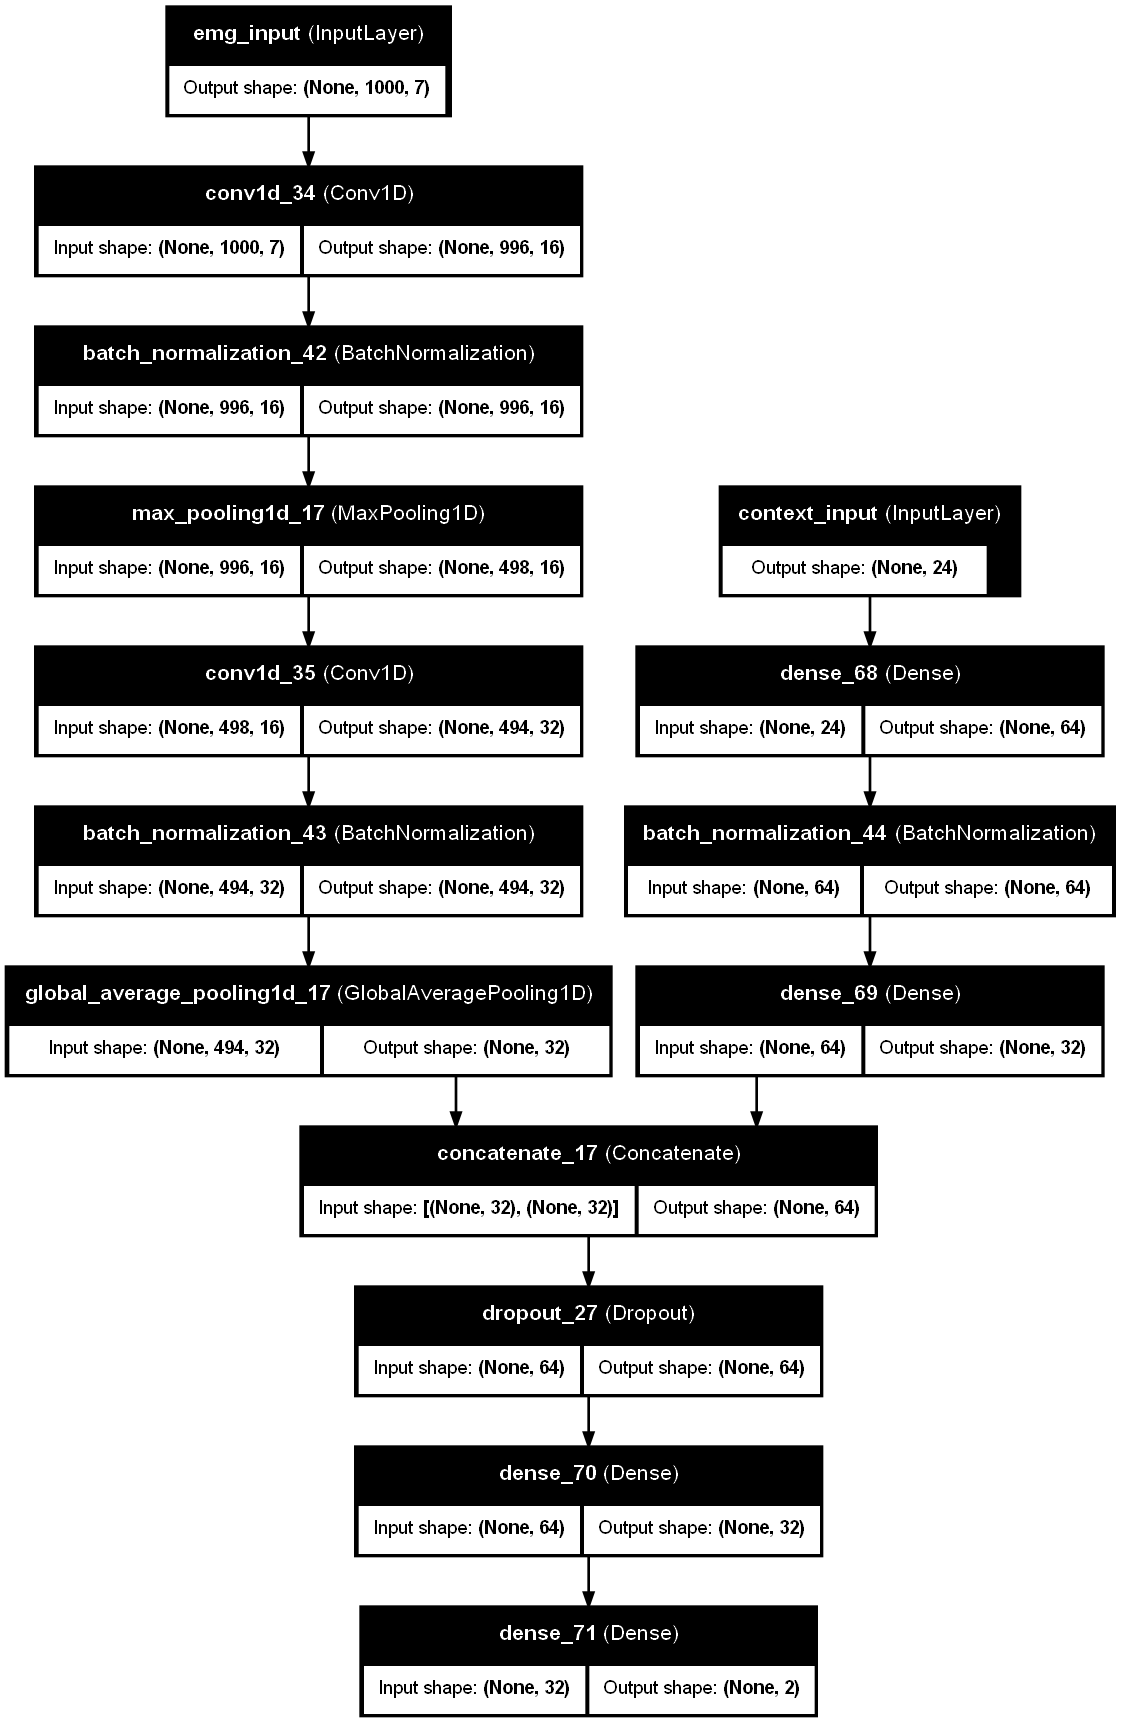

In [131]:
import pydot
import graphviz
from tensorflow.keras.utils import plot_model
plot_model(model, to_file=f'{plot_folder}\\{model_name}.png', 
           show_shapes=True, 
           show_layer_names=True, 
           expand_nested=True, 
           dpi=96, 
           rankdir='TB', 
           show_dtype=False,
           )

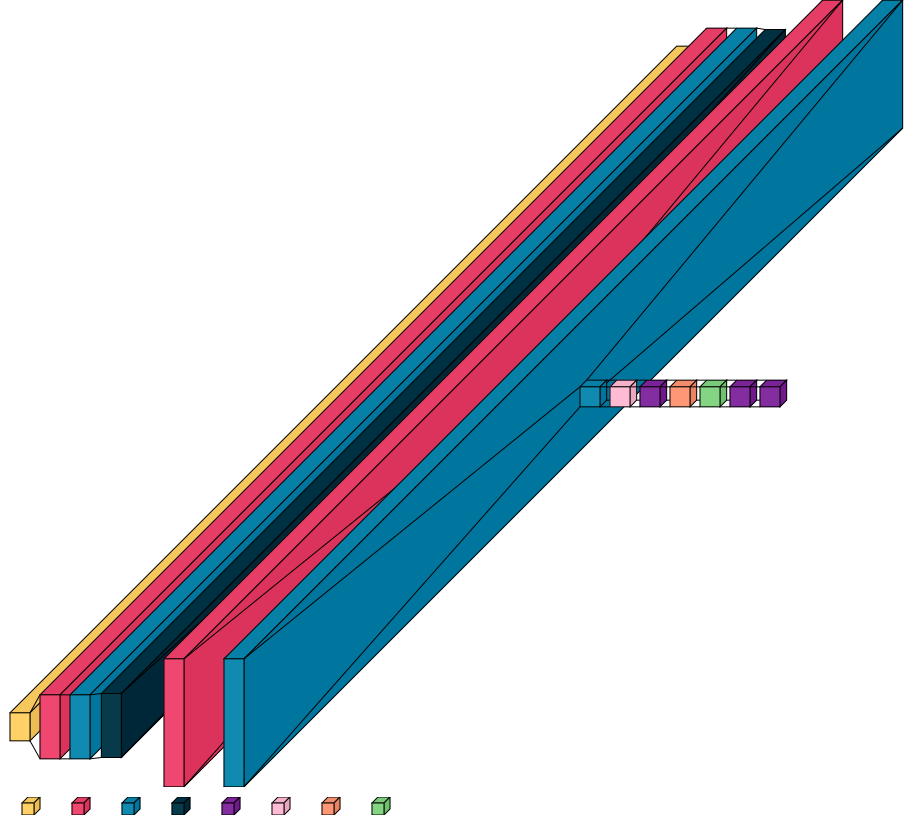

In [132]:
import visualkeras
visualkeras.layered_view(model, legend=True) # without custom font
